In [1]:
!rm -rf data
!rm -rf regresion
!rm -rf utilidades

In [2]:
!wget https://github.com/rodrigofvc/prediccion-temp-mexico/archive/refs/heads/main.zip

import zipfile

with zipfile.ZipFile("main.zip","r") as zip_ref:
  zip_ref.extractall(".")

!cp -rf "/content/prediccion-temp-mexico-main/data" "."
!cp -rf "/content/prediccion-temp-mexico-main/regresion" "."
!cp -rf "/content/prediccion-temp-mexico-main/utilidades" "."
!rm -rf "prediccion-temp-mexico-main"
!rm -rf "sample_data"
!rm "main.zip"

--2022-11-20 02:52:01--  https://github.com/rodrigofvc/prediccion-temp-mexico/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/rodrigofvc/prediccion-temp-mexico/zip/refs/heads/main [following]
--2022-11-20 02:52:01--  https://codeload.github.com/rodrigofvc/prediccion-temp-mexico/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [           <=>      ] 756.70M  14.3MB/s    in 50s     

2022-11-20 02:52:52 (15.3 MB/s) - ‘main.zip’ saved [793458006]



In [3]:
import pandas as pd

df = pd.read_csv("data/encb-90-fusionado.csv", encoding='utf8', encoding_errors='ignore')
df = df.drop(columns=['Unnamed: 11', 'Fecha UTC'], errors='ignore')

In [4]:
df

,Fecha Local,Direcci�n del Viento (grados),Direcci�n de r�faga (grados),Rapidez de viento (km/h),Rapidez de r�faga (km/h),Temperatura del Aire (�C),Humedad relativa (%),Presi�n Atmosf�rica (hpa),Precipitaci�n (mm),Radiaci�n Solar (W/m�)
0,2022-11-12 00:40:00,197.0,191.0,0.0,0.0,15.9,100,779.4,0.0,0.0
1,2022-11-12 00:30:00,196.0,191.0,0.0,0.0,16.0,100,779.4,0.0,0.0
2,2022-11-12 00:20:00,201.0,191.0,0.0,0.0,16.1,100,779.5,0.0,0.0
3,2022-11-12 00:10:00,189.0,191.0,0.0,0.0,16.2,99,779.5,0.0,0.0
4,2022-11-12 00:00:00,189.0,191.0,2.4,5.1,16.3,99,779.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16729,2022-07-17 15:50:00,19.0,315.0,9.0,14.9,23.9,48,778.2,0.0,582.0
16730,2022-07-17 15:40:00,81.0,58.0,11.0,16.6,24.1,47,778.5,0.0,272.0
16731,2022-07-17 15:30:00,35.0,76.0,5.1,17.7,24.4,47,778.6,0.0,256.0
16732,2022-07-17 15:20:00,20.0,23.0,10.4,18.9,24.6,45,778.7,0.0,807.0


In [5]:
df2 = df.drop(columns=['Fecha Local'], errors='ignore')

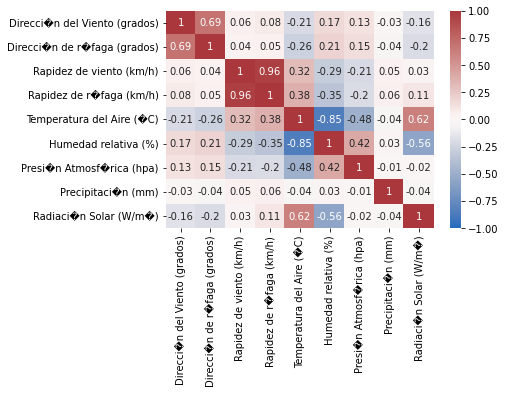

In [6]:
# Visualizing a Pandas Correlation Matrix Using Seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

matrix = df2.corr().round(2)
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()